In [192]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [141]:
df = pd.read_csv("housing.csv")

In [142]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [143]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [144]:
df.shape

(20640, 10)

In [145]:
df.isnull().values.any()

True

In [146]:
df = df.dropna()

In [147]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [148]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [149]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [150]:
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [151]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int64
dtype: object

In [152]:
y = df['median_house_value'].values

In [153]:
X = df.drop("median_house_value", axis=1)

In [154]:
print(X.shape)
print(y.shape)

(20433, 9)
(20433,)


In [155]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1er Modèle : Linear Regression

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, root_mean_squared_error

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r_2 = r2_score(y_test,y_pred)

print("The Mean Square error of the Linear Regression is :", mse)
print('RMSE of the linear regression :' , np.sqrt(mse))
print("The r_2 of the Linear Regression is :", r_2)

The Mean Square error of the Linear Regression is : 4739907925.629444
RMSE of the linear regression : 68846.98922704931
The r_2 of the Linear Regression is : 0.6444428814097638


In [170]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model = LinearRegression()

In [171]:
scoring = {
    'r2': 'r2',
    'rmse': make_scorer(lambda y_true, y_pred: root_mean_squared_error(y_true, y_pred))
}

cv_results = cross_validate(model, X_scaled, y, cv=kf, scoring=scoring, return_train_score=True)

In [172]:
print("R² test :", cv_results['test_r2'])
print("RMSE test :", cv_results['test_rmse'])
print("R² moyen :", cv_results['test_r2'].mean())
print("RMSE moyen :", cv_results['test_rmse'].mean())

R² test : [0.66861076 0.63793099 0.62377608 0.61780086 0.63100524]
RMSE test : [66433.24643556 69510.64480934 70493.08922004 71180.62766397
 70567.23317446]
R² moyen : 0.6358247865076782
RMSE moyen : 69636.96826067145


# Deuxième Modèle : RandomForestRegressor

In [176]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=100, random_state=42)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [178]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print('RMSE for the RandomForestRegressor :', rmse)
print('MAE for the RandomForestRegressor :', mae)

RMSE for the RandomForestRegressor : 49366.62038423899
MAE for the RandomForestRegressor : 32071.75519902121


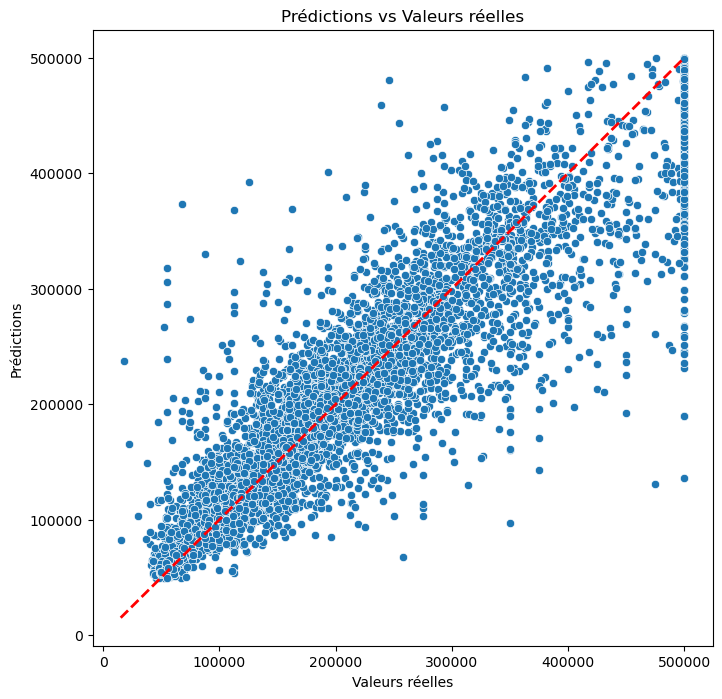

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs réelles')
plt.show()

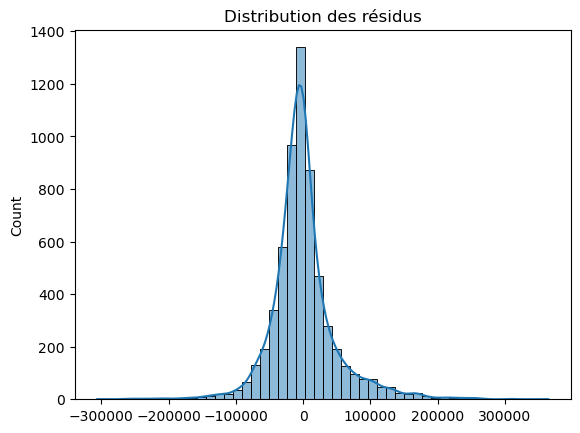

In [ ]:
residuals = y_test - y_pred
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribution des résidus")
plt.show()

# 3e Modèle : GradientBoostingRegressor

In [181]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [183]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test,y_pred)
r_2 = r2_score(y_test,y_pred)

print("RMSE for the GradientBoostingRegressor :", rmse)
print('R2 for the GradientBoostingRegressor :', r_2)

RMSE for the GradientBoostingRegressor : 52037.74287433797
R2 for the GradientBoostingRegressor : 0.7968689215001433


## Test avec Cross Validation

In [184]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'r2': 'r2',
    'rmse': make_scorer(lambda y_true, y_pred: root_mean_squared_error(y_true, y_pred))
}

model2 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

cv_results = cross_validate(model2, X, y, cv=kf, scoring=scoring, return_train_score=True)

In [185]:
print("R² test :", cv_results['test_r2'])
print("RMSE test :", cv_results['test_rmse'])
print("R² moyen :", cv_results['test_r2'].mean())
print("RMSE moyen :", cv_results['test_rmse'].mean())

R² test : [0.81335697 0.81247935 0.79048063 0.79702758 0.79119753]
RMSE test : [49856.54271759 50024.20422652 52606.01852647 51872.29637778
 53083.65444089]
R² moyen : 0.8009084112828345
RMSE moyen : 51488.54325784898


# 4e Modèle : XGBRegressor

In [186]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [188]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print('RMSE for the XGBRegressor :', rmse)
print('R2 for the XGBRegressor :', r2)
print('MAE for the XGBRegressor :', mae)

RMSE for the XGBRegressor : 47195.11772255423
R2 for the XGBRegressor : 0.8329164784778571
MAE for the XGBRegressor : 31345.614824632954


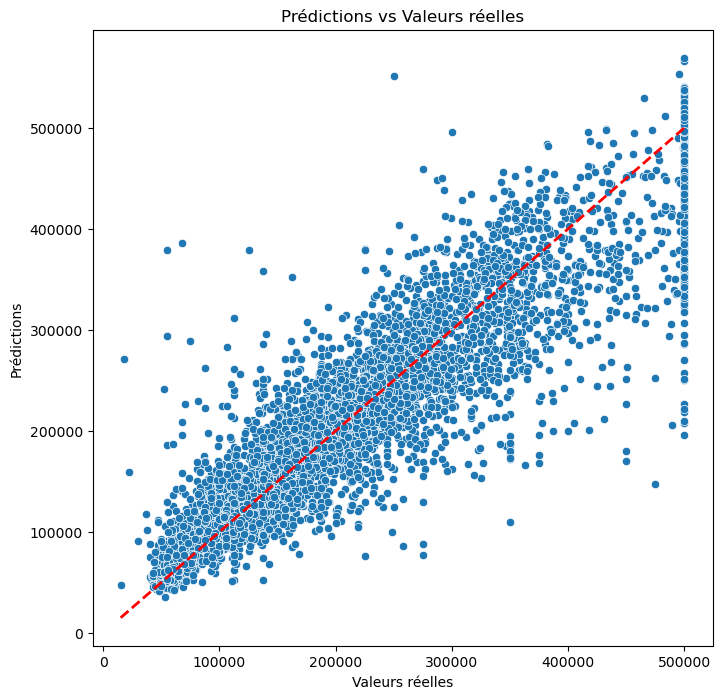

In [191]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs réelles')
plt.show()

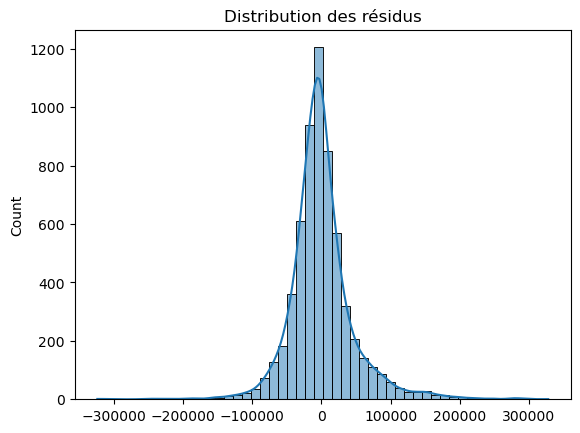

In [190]:
residuals = y_test - y_pred
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribution des résidus")
plt.show()